In [1]:
import pandas as pd, matplotlib.pyplot as plt

In [2]:
dati=pd.read_json("./data/dati-json/dpc-covid19-ita-regioni.json", convert_dates=["data"])
aree = {
    "nord" : [1, 2, 3, 4, 5, 6, 7, 8],
    "centro" : [9, 10, 11, 12],
    "sud" : [13, 14, 15, 16, 17, 18, 19, 20] # 13 abruzzo, 20 sardegna
}

def get_area(codice):
    for k, v in aree.items():
        if int(codice) in v:
            return k

In [3]:
dati['area'] = dati['codice_regione'].map(get_area)

CPU times: user 2.6 s, sys: 30.8 ms, total: 2.63 s
Wall time: 2.65 s


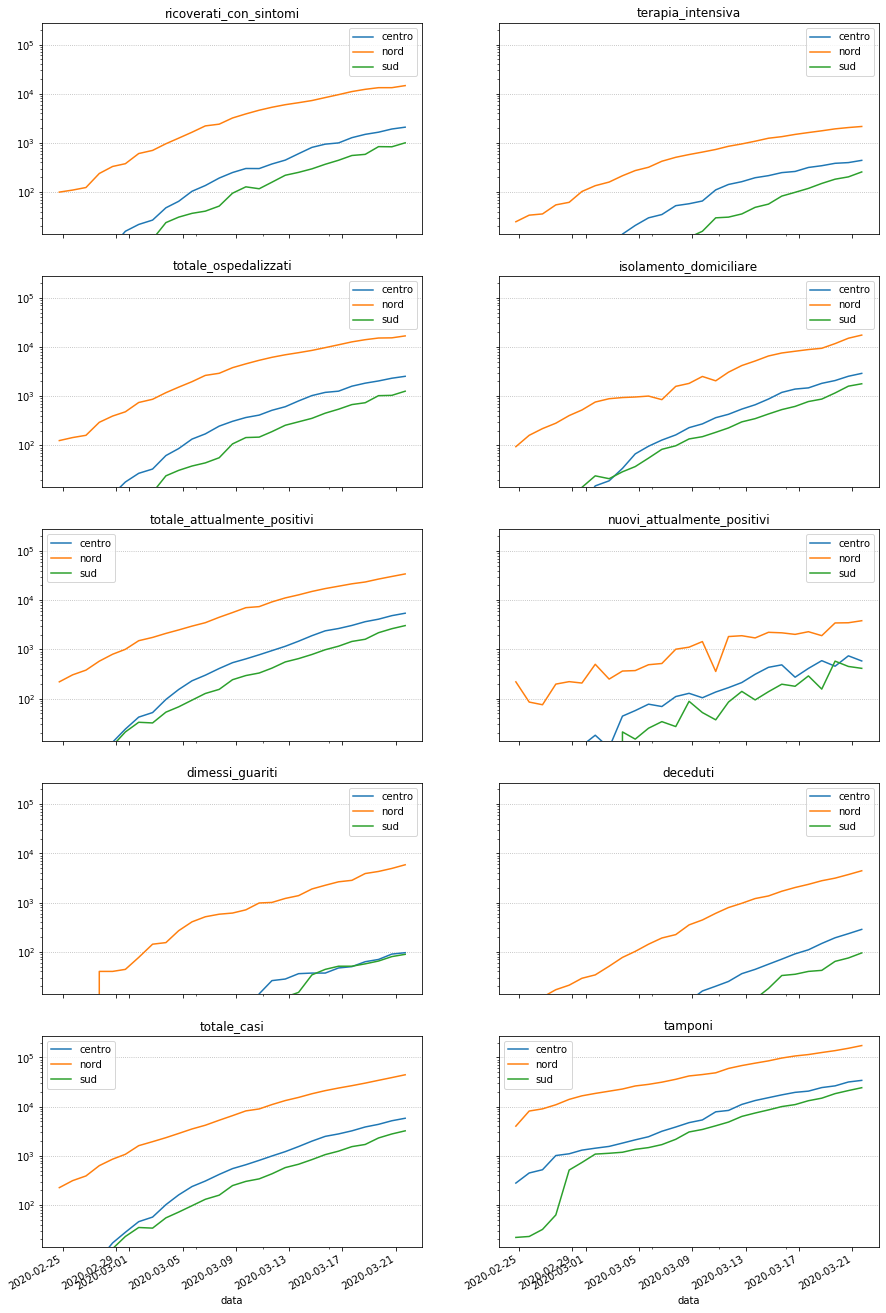

In [4]:
%%time
colonne = [
    "ricoverati_con_sintomi",
    "terapia_intensiva",
    "totale_ospedalizzati",
    "isolamento_domiciliare",
    "totale_attualmente_positivi",
    "nuovi_attualmente_positivi",
    "dimessi_guariti",
    "deceduti",
    "totale_casi",
    "tamponi"
]

fig, axes = plt.subplots(5,2,sharex=True,sharey=True,figsize=(15,25))

i=0
    
for n,t in dati.groupby("area"):
    t = t.groupby("data").sum()
    for c in colonne:
        ax = axes.flatten()[i % len(axes.flatten())]; i += 1
        ax.semilogy()
        t.plot(y=c, ax=ax, label=n, title=c)
        ax.grid(True, axis='y', ls=':')

(0, 0.3)

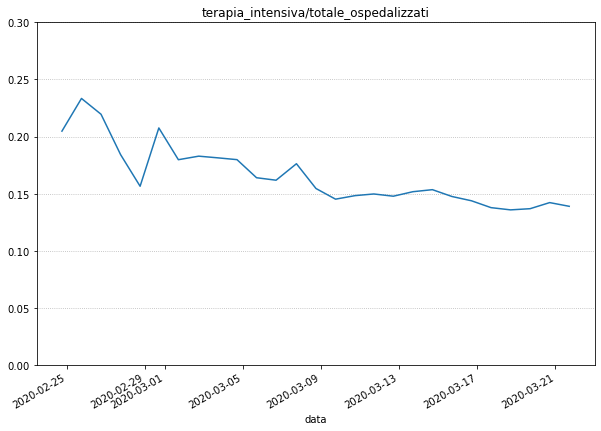

In [5]:
fig, ax = plt.subplots(figsize=(10,7))
complessiva=dati.groupby("data").sum()
(complessiva['terapia_intensiva']/complessiva['totale_ospedalizzati'])\
    .plot(ax=ax, title='terapia_intensiva/totale_ospedalizzati')
ax.grid(ls=':', axis='y')
ax.set_ylim(bottom=0, top=.3)